In [82]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from sklearn import preprocessing


# query data from mongodb

In [62]:
##connect to mongodb, select database and collection
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['covid_project'] # Replace mongo db name
collection_name = 'mobility' # Replace mongo db collection name
db_cm = mng_db[collection_name]
collection_name = 'covid_cases' # Replace mongo db collection name
db_case = mng_db[collection_name]

In [63]:
query = {}
cursor = db_cm.find(query)
df_mob =  pd.DataFrame(list(cursor))
df_mob.head()

,_id,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,6166afe901871137d255445f,AU,Australia,None,None,None,None,None,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,6166afe901871137d2554460,AU,Australia,None,None,None,None,None,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,6166afe901871137d2554461,AU,Australia,None,None,None,None,None,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,6166afe901871137d2554462,AU,Australia,None,None,None,None,None,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,6166afe901871137d2554463,AU,Australia,None,None,None,None,None,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0


In [64]:
query = {}
cursor = db_case.find(query)
df_case = pd.DataFrame(list(cursor))
df_case.head()

,_id,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,6166ade1d7887925a87b9561,2020-01-25,Australian Capital Territory,ACT,0,0,0,0,0,0.0,0,0,0
1,6166ade1d7887925a87b9562,2020-01-25,New South Wales,NSW,3,0,0,0,0,0.0,0,0,0
2,6166ade1d7887925a87b9563,2020-01-25,Northern Territory,NT,0,0,0,0,0,0.0,0,0,0
3,6166ade1d7887925a87b9564,2020-01-25,Queensland,QLD,0,0,0,0,0,0.0,0,0,0
4,6166ade1d7887925a87b9565,2020-01-25,South Australia,SA,0,0,0,0,0,0.0,0,0,0


# change the type of date column

In [65]:
pd.to_datetime(df_mob["date"], format="%Y-%m-%d")

0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
166115   2021-10-04
166116   2021-10-05
166117   2021-10-06
166118   2021-10-07
166119   2021-10-08
Name: date, Length: 166120, dtype: datetime64[ns]

In [66]:
pd.to_datetime(df_case["date"], format="%Y-%m-%d")

0      2020-01-25
1      2020-01-25
2      2020-01-25
3      2020-01-25
4      2020-01-25
          ...    
5011   2021-10-12
5012   2021-10-12
5013   2021-10-12
5014   2021-10-12
5015   2021-10-12
Name: date, Length: 5016, dtype: datetime64[ns]

# create a subset of data

In [278]:
##creating the subset data
# mob_state = 'victoria'
# mob_sub_region_2='Brisbane City'
mob_state = 'Victoria'
mob_sub_region_2='City of Melbourne'
df_mob_state =df_mob[(df_mob['sub_region_1']==mob_state) & (df_mob['sub_region_2']==mob_sub_region_2)]
df_mob_state.reset_index(drop=True, inplace=True)
df_mob_state.head()

,_id,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,6166afeb01871137d256fe2c,AU,Australia,Victoria,City of Melbourne,None,None,None,ChIJv_FYgkNd1moRpxLuRXZURFs,2020-02-15,1.0,-1.0,-31.0,6.0,0.0,2.0
1,6166afeb01871137d256fe2d,AU,Australia,Victoria,City of Melbourne,None,None,None,ChIJv_FYgkNd1moRpxLuRXZURFs,2020-02-16,3.0,7.0,-8.0,2.0,-2.0,0.0
2,6166afeb01871137d256fe2e,AU,Australia,Victoria,City of Melbourne,None,None,None,ChIJv_FYgkNd1moRpxLuRXZURFs,2020-02-17,3.0,9.0,-1.0,10.0,7.0,-2.0
3,6166afeb01871137d256fe2f,AU,Australia,Victoria,City of Melbourne,None,None,None,ChIJv_FYgkNd1moRpxLuRXZURFs,2020-02-18,0.0,-2.0,-23.0,4.0,6.0,1.0
4,6166afeb01871137d256fe30,AU,Australia,Victoria,City of Melbourne,None,None,None,ChIJv_FYgkNd1moRpxLuRXZURFs,2020-02-19,8.0,4.0,-19.0,5.0,4.0,1.0


In [281]:
##creating the subset data
# case_state = 'victoria'
case_state = 'Victoria'

df_case_state =df_case[df_case['state']==case_state]
df_case_state.head()

,_id,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
6,6166ade1d7887925a87b9567,2020-01-25,Victoria,VIC,1,0,0,0,0,0.0,0,0,0
14,6166ade1d7887925a87b956f,2020-01-26,Victoria,VIC,0,0,0,0,0,0.0,0,0,0
22,6166ade1d7887925a87b9577,2020-01-27,Victoria,VIC,0,0,0,0,0,0.0,0,0,0
30,6166ade1d7887925a87b957f,2020-01-28,Victoria,VIC,0,0,0,0,0,0.0,0,0,0
38,6166ade1d7887925a87b9587,2020-01-29,Victoria,VIC,2,0,0,0,0,0.0,0,0,0


In [378]:
df_mob_state_sub=df_mob_state[(df_mob_state['date'] > '2020-02-15') & (df_mob_state['date'] < '2021-10-01')]
df_mob_state_sub.reset_index(drop=True, inplace=True)


In [379]:
mobility_list = ['transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
df_mob_state_sub = df_mob_state_sub[['date'] + mobility_list]

In [380]:
df_mob_state_sub

,date,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-16,2.0,-2.0,0.0
1,2020-02-17,10.0,7.0,-2.0
2,2020-02-18,4.0,6.0,1.0
3,2020-02-19,5.0,4.0,1.0
4,2020-02-20,8.0,5.0,-1.0
...,...,...,...,...
588,2021-09-26,-78.0,-36.0,14.0
589,2021-09-27,-83.0,-62.0,28.0
590,2021-09-28,-84.0,-62.0,29.0
591,2021-09-29,-85.0,-62.0,32.0


In [375]:
df_case_state_sub=df_case_state[(df_case_state['date'] > '2020-02-15') & (df_case_state['date'] < '2021-10-01')]
df_case_state_sub.reset_index(drop=True, inplace=True)


In [376]:
df_case_state_sub = df_case_state_sub[['date','confirmed']]

In [377]:
df_case_state_sub

,date,confirmed
0,2020-02-16,0
1,2020-02-17,0
2,2020-02-18,0
3,2020-02-19,0
4,2020-02-20,0
...,...,...
588,2021-09-26,767
589,2021-09-27,834
590,2021-09-28,859
591,2021-09-29,929


# analysis 

In [348]:
case_no = df_case_state_sub['confirmed']
case_no_smooth = case_no.rolling(window =10).mean()

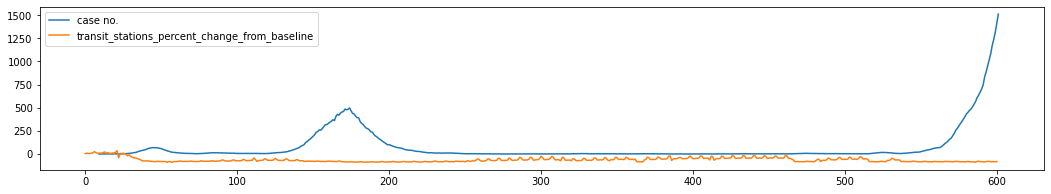

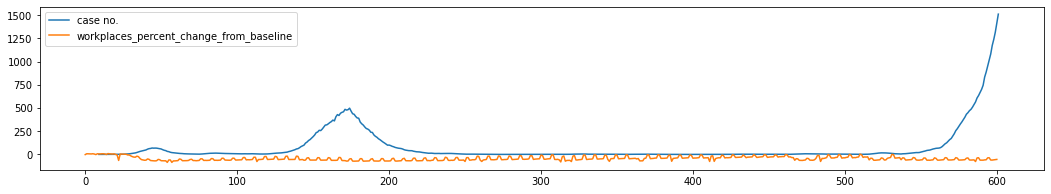

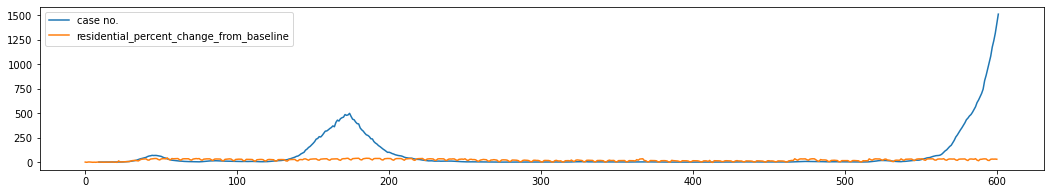

In [349]:
for mob in mobility_list:
    mobility_1 = df_mob_state_sub[mob]
    plt.figure(figsize=(18, 3))
    plt.plot(case_no_smooth, label='case no.')
    plt.plot(mobility_1, label=mob)
    plt.legend()    

correlation of beta with transit_stations_percent_change_from_baseline :  0.6122334679778402
correlation of beta with workplaces_percent_change_from_baseline :  0.22425136311299676
correlation of beta with residential_percent_change_from_baseline :  -0.18109915854641007


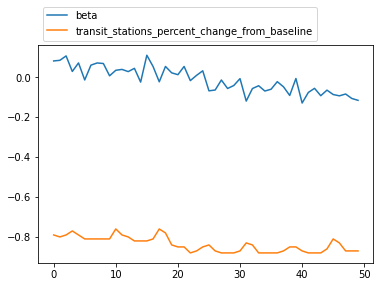

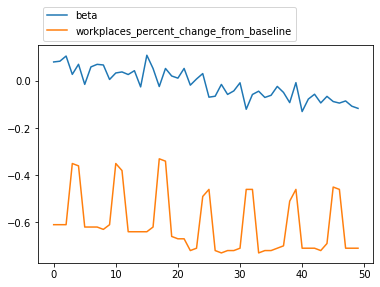

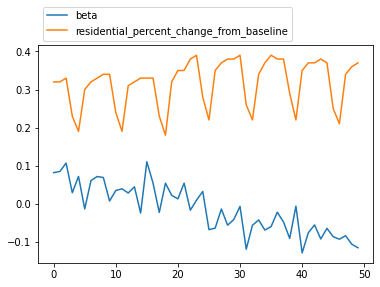

In [361]:
import numpy as np
from numpy import cov


s = 150
e = s + 50

delta = np.array(case_no_smooth[s:e]) - np.array(case_no_smooth[s-1:e-1])
# dalta = beta * n_total
beta = delta / (pd.DataFrame.abs(case_no_smooth[s:e]) + 1)
beta = np.array(beta)

for i, mob in enumerate(mobility_list):
    mob_1 = df_mob_state_sub[mob]
    mob_1 = np.array(mob_1[s:e])
    c = np.corrcoef(beta,mob_1)
    print('correlation of beta with', mob, ': ', c[0,1])
    plt.figure()
    plt.plot(beta, label='beta')
    plt.plot(mob_1/100, label=mob)
    plt.legend( loc='upper left', bbox_to_anchor=(0,1.2))
